# Statistical Analysis of BI Tool Selection
### Thesis Topic:  Map out the best BI tool and SPC software for a case company: selection and rationalization process.

### Comprehensive analysis of BI tool selection process for the case company, encompassing: 
#### 1. Descriptive analysis
#### 2. Correlation analysis
#### 3. Hypothesis testing,
#### 4. Regression analysis.

In [1]:
# Libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the Excel file
data = pd.read_excel('Bi stats.xlsx')

# The range of rows and columns (for specific extraction of rows and column of excel file)
rows_range = range(0, 11)  
columns_range = data.columns[0:32]  

# the specific cells extraction
df = data.loc[rows_range, columns_range]

df

,Capabilities,Zoho Analytics,Microsoft Power BI,Yellowfin,SAP BusinessObjects BI Suite,MicroStrategy,Board Intelligence,Pentaho,Jaspersoft,QlikView,...,Google data Studio,DOMO,Alteryx,Amazon QuickSight,ThoughtSpot,Infor Birst,Apache Superset,Pyramid analytics,Alibaba Cloud,Splunk
0,Efficacy 1,4.13,3.75,3,3.13,3.13,2.75,3.63,3.63,3.83,...,3.5,3,3.13,2.5,3.13,2.88,3.25,3.13,3.55,3.00
1,Efficacy 2,3.5,4,4,4.5,4,1,2,2.25,4,...,3.75,3.25,2.5,2.75,3.75,3,3.5,3.75,3.75,3.00
2,Efficacy 3,3,4,3.5,3,3.5,2.5,2,2.5,4,...,4,4,3.8,4,3.8,3.5,3.5,4,4,4.00
3,Efficacy 4,4.4,4.53,4.48,4.4,4.3,4.33,4.2,4.13,4.25,...,4.45,4.4,4.73,3.98,4.15,3.98,0,4.45,4.375,4.45
4,Efficacy 5,3.5,4.2,3,2.5,3,3,3,2.5,4,...,4,4.2,4,4.1,4.2,4,4,4,4,4.00
5,Efficacy 6,4,4,3.5,2.7,4,1.8,2,2.5,4,...,4.1,4,3.8,4.2,3.8,3.5,3.5,4,4,4.00
6,Efficacy 7,4.5,4.4,4,4,4.2,4,4,4,4.1,...,4.3,4.4,4.3,4.4,4.4,4,3.7,4.6,4.3,4.00
7,Efficacy 8,2.5,3.5,2,2,3.5,2.5,2,3,4,...,3.8,4,4,3.8,4.3,3.7,3.5,4,3,3.50
8,Efficacy 9,4,4.5,3.5,4,3.5,3,1.8,3,4.1,...,3.8,4,4,4.2,4,3,4,4,3.8,3.50
9,Efficacy 10,3.875,4.3,2.75,2.625,3.95,2.875,3.88,3.125,4.1,...,3.4,3.95,4.3,4.13,4.43,3,3.38,4.225,4.2,4.00


# 1. Descriptive statistics

In [3]:
# The range of rows and columns (for specific extraction of rows and column of excel file)

rows_range = range(1, 11) 
columns_range = data.columns[1:32] 

# Extract the specific cells
df = data.loc[rows_range, columns_range]

# specifying the meanings to Efficacy variables
meanings = {
    'Efficacy 1': 'Software platform compatibility',
    'Efficacy 2': 'Software configurability and customizability',
    'Efficacy 3': 'Third-party software compatibility',
    'Efficacy 4': 'Public Review',
    'Efficacy 5': 'Flexibility to adapt to different techniques (Adaptability), versatility and usefulness',
    'Efficacy 6': 'Customer support',
    'Efficacy 7': 'User Experiences',
    'Efficacy 8': 'Community and Social media acceptance according to followers and likes',
    'Efficacy 9': 'Instruction materials, user guide, training and so on',
    'Efficacy 10': 'Not specified'
}

# The index labels with meanings
df = df.rename(index=meanings)

# Convertion of columns to numeric values
df = df.apply(pd.to_numeric, errors='coerce')

# The descriptive statistics for each tool excluding 'Total Weight'
stats = df.iloc[:-1].describe().transpose()

# Setting display options
pd.set_option('display.width', 1000)  # Display in a single line

print(round(stats, 2))


                               count  mean   std   min   25%   50%   75%   max
Zoho Analytics                   9.0  3.70  0.65  2.50  3.50  3.88  4.00  4.50
Microsoft Power BI               9.0  4.16  0.32  3.50  4.00  4.20  4.40  4.53
Yellowfin                        9.0  3.41  0.75  2.00  3.00  3.50  4.00  4.48
SAP BusinessObjects BI Suite     9.0  3.30  0.93  2.00  2.62  3.00  4.00  4.50
MicroStrategy                    9.0  3.77  0.42  3.00  3.50  3.95  4.00  4.30
Board Intelligence               9.0  2.78  1.02  1.00  2.50  2.88  3.00  4.33
Pentaho                          9.0  2.76  1.01  1.80  2.00  2.00  3.88  4.20
Jaspersoft                       9.0  3.00  0.67  2.25  2.50  3.00  3.12  4.13
QlikView                         9.0  4.06  0.09  4.00  4.00  4.00  4.10  4.25
Information Builders WebFOCUS    9.0  3.72  0.39  2.95  3.50  3.90  4.00  4.03
IBM Cognos Analytics             9.0  3.84  0.37  3.00  3.80  4.00  4.00  4.13
Dundas BI                        9.0  3.74  0.60  2.

### Calculating the mean, median, standard deviation, variance, range, IQR for Microsoft Power BI

In [4]:
print(df.columns)

Index(['Zoho Analytics', 'Microsoft Power BI', 'Yellowfin', 'SAP BusinessObjects BI Suite', 'MicroStrategy', 'Board Intelligence', 'Pentaho', 'Jaspersoft', 'QlikView', 'Information Builders WebFOCUS', 'IBM Cognos Analytics', 'Dundas BI', 'Style Intelligence', 'Tellius', 'Logility', 'Oracle Analytics Cloud', 'SAS', 'Sisense', 'Tableau', 'Tibco Spotfire', 'Looker', 'Google data Studio', 'DOMO', 'Alteryx', 'Amazon QuickSight', 'ThoughtSpot', 'Infor Birst', 'Apache Superset', 'Pyramid analytics', 'Alibaba Cloud', 'Splunk'], dtype='object')


In [5]:
# The row corresponding to 'Microsoft Power BI' from the DataFrame
power_bi =  df[df.columns[1]] 

In [6]:
mean = round(power_bi.mean(), 2)
print("Mean:", mean)

Mean: 7.86


In [7]:
median = power_bi.median()
print("Median:", median)

Median: 4.25


In [8]:
std = round(power_bi.std(), 2)

print("Standard Deviation:", std)

Standard Deviation: 11.71


In [9]:
variance = round(power_bi.var(), 2)

print("Variance:", variance)

Variance: 137.11


In [10]:
data_range = max(power_bi) - min(power_bi)
print("Range:", data_range)

Range: 37.675


In [11]:
# first qurtile, 25%
q1 = power_bi.quantile(0.25)

# third qurtile, 75%
q3 = power_bi.quantile(0.75)

# Inter-quartile range
iqr = round((q3 - q1),2)

print("Interquartile Range (IQR):", iqr)

Interquartile Range (IQR): 0.47


## Descriptive Statistics of BI Tools: Box Plot

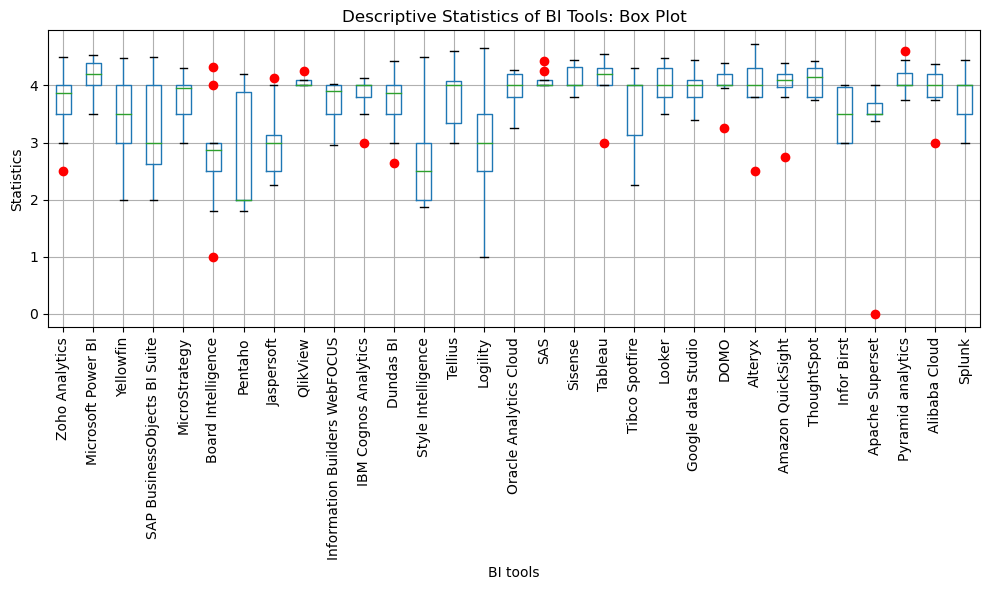

In [12]:
# Setting the figure size
plt.figure(figsize=(10, 6))

# box plots for each column 
df.iloc[:-1].boxplot(rot=90, sym='ro')

# The title and labels
plt.title('Descriptive Statistics of BI Tools: Box Plot')
plt.xlabel('BI tools')
plt.ylabel('Statistics')

# to prevent overlapping labels adjusting labels
plt.tight_layout()

# Show the plot
plt.show()


# Descriptive Statistics of BI Tools: Violinplot 

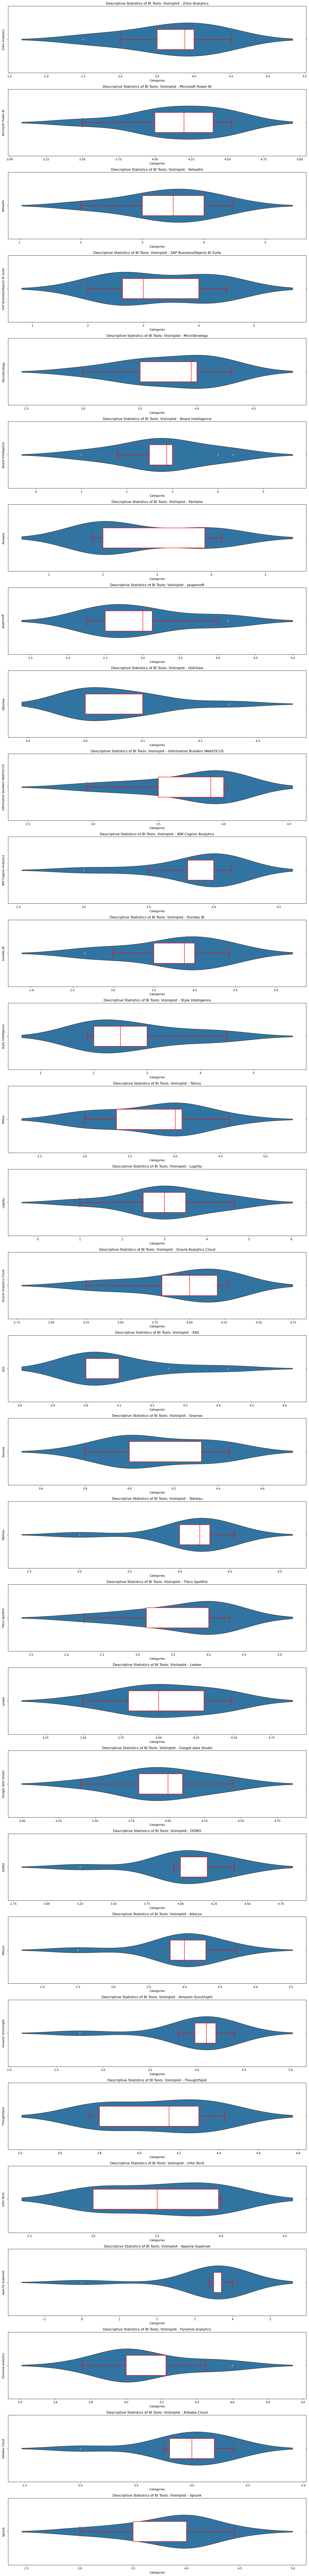

In [13]:
# Setting the figure size
fig, axes = plt.subplots(len(df.iloc[:-1].columns), 1, figsize=(15, 4*len(df.iloc[:-1].columns)))

# Violin plots for each column
for i, column in enumerate(df.iloc[:-1].columns):
    ax = axes[i]
    ax1 = ax.twinx()
    sns.violinplot(x=df.iloc[:-1][column], ax=ax, inner=None, scale='width', width=0.5)
    sns.boxplot(x=df.iloc[:-1][column], ax=ax1, width=0.3, color='white', whiskerprops=dict(color='red'), boxprops=dict(edgecolor='red'),
                medianprops=dict(color='red'), capprops=dict(color='red'))
    ax.set_title(f'Descriptive Statistics of BI Tools: Violinplot - {column}')
    ax.set_xlabel('Categories')
    ax.set_ylabel(column)

    
    for artist in ax1.artists:
        artist.set_alpha(0)

# to prevent overlapping labels adjusting labels
plt.tight_layout()


plt.show()

## Gathering information about the DataFrame

In [14]:
# Retrieving information about the DataFrame using the .info() method
info = df.iloc[:-1].info()

info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 1 to 9
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Zoho Analytics                 9 non-null      float64
 1   Microsoft Power BI             9 non-null      float64
 2   Yellowfin                      9 non-null      float64
 3   SAP BusinessObjects BI Suite   9 non-null      float64
 4   MicroStrategy                  9 non-null      float64
 5   Board Intelligence             9 non-null      float64
 6   Pentaho                        9 non-null      float64
 7   Jaspersoft                     9 non-null      float64
 8   QlikView                       9 non-null      float64
 9   Information Builders WebFOCUS  9 non-null      float64
 10  IBM Cognos Analytics           9 non-null      float64
 11  Dundas BI                      9 non-null      float64
 12  Style Intelligence             9 non-null      float64

# 2. The correlation analysis

In [15]:
# The correlation matrix
correlation_matrix = df.iloc[:-1].corr()

# Setting display options
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', 1000)  # Display in a single line

# Applying background gradient to correlation matrix and round the values
styled_matrix = correlation_matrix.style.background_gradient(cmap='coolwarm').format(precision=2)

# Displaying the styled correlation matrix
display(styled_matrix)

,Zoho Analytics,Microsoft Power BI,Yellowfin,SAP BusinessObjects BI Suite,MicroStrategy,Board Intelligence,Pentaho,Jaspersoft,QlikView,Information Builders WebFOCUS,IBM Cognos Analytics,Dundas BI,Style Intelligence,Tellius,Logility,Oracle Analytics Cloud,SAS,Sisense,Tableau,Tibco Spotfire,Looker,Google data Studio,DOMO,Alteryx,Amazon QuickSight,ThoughtSpot,Infor Birst,Apache Superset,Pyramid analytics,Alibaba Cloud,Splunk
Zoho Analytics,1.00,0.87,0.71,0.61,0.62,0.51,0.62,0.59,0.68,0.09,0.05,0.18,0.48,-0.09,0.54,0.64,0.46,0.87,0.59,0.49,0.71,0.44,0.40,0.37,0.37,0.17,0.11,-0.36,0.65,0.82,0.44
Microsoft Power BI,0.87,1.00,0.65,0.62,0.32,0.62,0.59,0.54,0.74,0.00,0.09,0.30,0.30,0.07,0.52,0.52,0.42,0.71,0.48,0.41,0.68,0.30,0.41,0.43,0.38,0.18,0.02,-0.34,0.56,0.82,0.44
Yellowfin,0.71,0.65,1.00,0.88,0.60,0.24,0.30,0.35,0.52,0.57,-0.27,-0.04,0.59,-0.38,0.27,0.03,0.40,0.60,0.14,0.12,0.25,0.63,0.08,-0.04,-0.11,-0.37,0.12,-0.50,0.34,0.69,0.22
SAP BusinessObjects BI Suite,0.61,0.62,0.88,1.00,0.56,0.18,0.21,0.36,0.54,0.32,-0.50,-0.11,0.38,-0.30,0.02,-0.12,0.32,0.42,0.27,-0.04,0.10,0.37,-0.12,-0.18,-0.32,-0.26,-0.12,-0.40,0.23,0.45,-0.13
MicroStrategy,0.62,0.32,0.60,0.56,1.00,0.19,0.48,0.57,0.57,0.07,-0.04,0.02,0.62,-0.27,0.24,0.28,0.63,0.76,0.33,0.03,0.37,0.32,0.04,0.11,-0.08,0.05,-0.03,-0.56,0.54,0.46,0.20
Board Intelligence,0.51,0.62,0.24,0.18,0.19,1.00,0.76,0.89,0.78,0.10,0.69,0.92,0.63,0.55,0.90,0.69,0.34,0.60,0.40,0.74,0.89,0.53,0.90,0.89,0.67,0.66,0.60,-0.50,0.88,0.49,0.73
Pentaho,0.62,0.59,0.30,0.21,0.48,0.76,1.00,0.78,0.72,0.05,0.58,0.70,0.52,0.35,0.77,0.65,0.61,0.84,0.59,0.38,0.87,0.32,0.60,0.65,0.36,0.70,0.45,-0.53,0.86,0.69,0.66
Jaspersoft,0.59,0.54,0.35,0.36,0.57,0.89,0.78,1.00,0.86,0.04,0.51,0.77,0.74,0.39,0.77,0.65,0.48,0.71,0.52,0.61,0.82,0.52,0.72,0.76,0.46,0.64,0.47,-0.61,0.93,0.43,0.55
QlikView,0.68,0.74,0.52,0.54,0.57,0.78,0.72,0.86,1.00,-0.05,0.33,0.56,0.60,0.03,0.64,0.59,0.76,0.74,0.57,0.48,0.77,0.40,0.53,0.66,0.29,0.38,0.20,-0.79,0.73,0.57,0.54
Information Builders WebFOCUS,0.09,0.00,0.57,0.32,0.07,0.10,0.05,0.04,-0.05,1.00,-0.04,0.09,0.57,-0.17,0.27,-0.24,-0.07,0.09,-0.22,0.15,-0.05,0.80,0.19,-0.14,-0.15,-0.37,0.66,-0.26,0.11,0.24,0.21


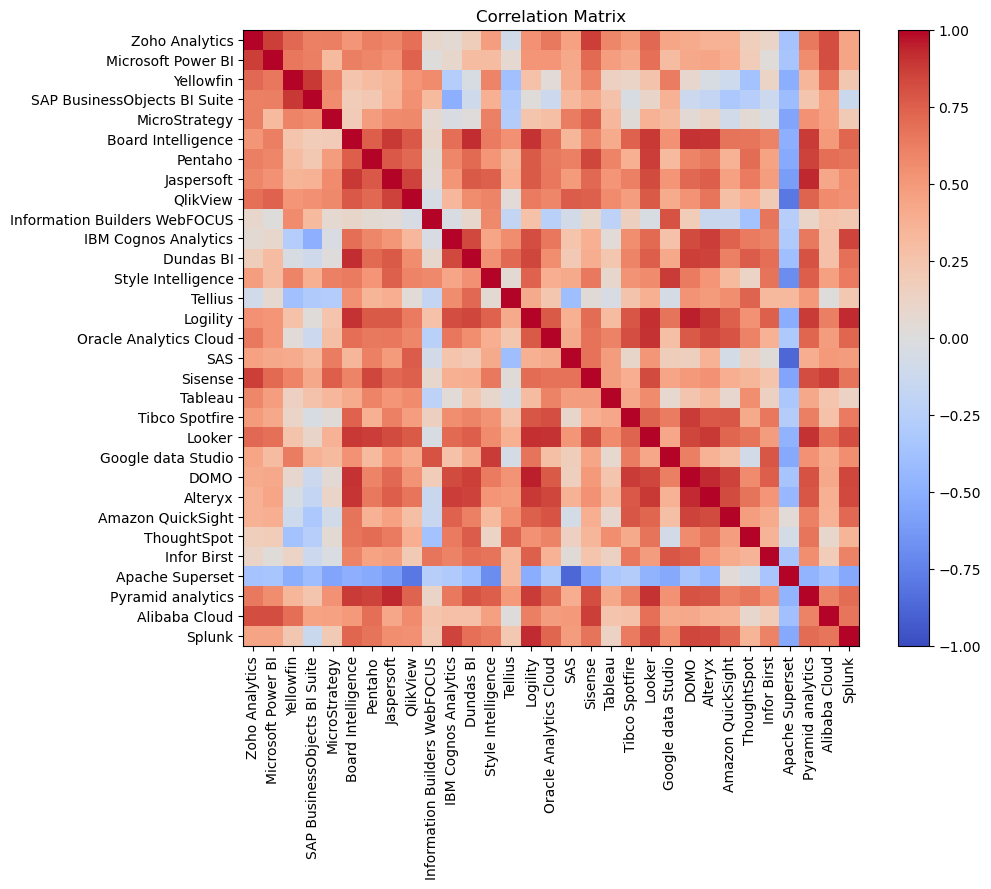

In [23]:
# Saving the correlation matrix as an image in JPG format.

plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix')

plt.savefig('correlation_matrix.jpg', format='jpg')
plt.show()

# 3. Hypothesis testing

In [17]:
import itertools
import scipy.stats as stats

# Creating a list of all possible tool pairs
tool_pairs = list(itertools.combinations(df.iloc[:-1].columns, 2))

# The significance level
alpha = 0.05

# Conducting hypothesis test for each pair of tools
for pair in tool_pairs:
    tool1 = pair[0]
    tool2 = pair[1]
    ratings1 = df.iloc[:-1][tool1]
    ratings2 = df.iloc[:-1][tool2]
    corr_coeff, p_value = stats.pearsonr(ratings1, ratings2)
    
    # Comparing the p-value with the significance level
    if p_value < alpha:
        print(f" Null hypothesis rejected. There is a significant correlation between {tool1} and {tool2}.")
    else:
        print(f" Null hypothesis accepted. There is no significant correlation between {tool1} and {tool2}.")

 Null hypothesis rejected. There is a significant correlation between Zoho Analytics and Microsoft Power BI.
 Null hypothesis rejected. There is a significant correlation between Zoho Analytics and Yellowfin.
 Null hypothesis accepted. There is no significant correlation between Zoho Analytics and SAP BusinessObjects BI Suite.
 Null hypothesis accepted. There is no significant correlation between Zoho Analytics and MicroStrategy.
 Null hypothesis accepted. There is no significant correlation between Zoho Analytics and Board Intelligence.
 Null hypothesis accepted. There is no significant correlation between Zoho Analytics and Pentaho.
 Null hypothesis accepted. There is no significant correlation between Zoho Analytics and Jaspersoft.
 Null hypothesis rejected. There is a significant correlation between Zoho Analytics and QlikView.
 Null hypothesis accepted. There is no significant correlation between Zoho Analytics and Information Builders WebFOCUS.
 Null hypothesis accepted. There is

In [18]:
# Finding the tools where only there is a significant correlation between between pairs of tools.

# Conducting hypothesis test for each pair of tools
for pair in tool_pairs:
    tool1 = pair[0]
    tool2 = pair[1]
    ratings1 = df.iloc[:-1][tool1]
    ratings2 = df.iloc[:-1][tool2]
    corr_coeff, p_value = stats.pearsonr(ratings1, ratings2)
    
    # Compare the p-value with the significance level
    if p_value < alpha:
        print(f" Null hypothesis rejected. There is a significant correlation between {tool1} and {tool2}.")

 Null hypothesis rejected. There is a significant correlation between Zoho Analytics and Microsoft Power BI.
 Null hypothesis rejected. There is a significant correlation between Zoho Analytics and Yellowfin.
 Null hypothesis rejected. There is a significant correlation between Zoho Analytics and QlikView.
 Null hypothesis rejected. There is a significant correlation between Zoho Analytics and Sisense.
 Null hypothesis rejected. There is a significant correlation between Zoho Analytics and Looker.
 Null hypothesis rejected. There is a significant correlation between Zoho Analytics and Alibaba Cloud.
 Null hypothesis rejected. There is a significant correlation between Microsoft Power BI and QlikView.
 Null hypothesis rejected. There is a significant correlation between Microsoft Power BI and Sisense.
 Null hypothesis rejected. There is a significant correlation between Microsoft Power BI and Looker.
 Null hypothesis rejected. There is a significant correlation between Microsoft Power B

# 4. Regression analysis

## Data Preparation and Linear Regression Training

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import pandas as pd
import numpy as np

# Select the predictors (tools) from the DataFrame
predictors = df.iloc[1:, 1:11]  # Exclude the first row and select the first 10 columns

# Select the target (efficacy scores) for all tools
target = df.iloc[1:, 11:]  # Exclude the first row and select the columns for the target

# Train the linear regression model
regressor = LinearRegression()
regressor.fit(predictors, target)


LinearRegression()

## Ridge Regression Training and Efficacy Score Prediction for a New Tool

In [28]:
import matplotlib.image as mpimg
from sklearn.linear_model import Ridge

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=42)

# Training the Ridge regression model
regressor = Ridge(alpha=1.0)  # You can adjust the alpha parameter to control the amount of regularization
regressor.fit(X_train, y_train)

# Example data for a new tool (scaled between 0 and 5)
new_tool = [[3.5, 5, 4.5, 3.0, 4.0, 3.8, 4.0, 3.5, 2.9, 4.8]] 

# Predicting the efficacy scores for the new tool
new_tool_pred = regressor.predict(new_tool)

# The predicted efficacy scores for the new tool (Software X)
predicted_scores = new_tool_pred[0][:10]

print("Predicted Efficacy Scores for BI tool X:")
print()
print("           Software X")
for i, efficacy_score in enumerate(predicted_scores):
    print(f"Efficacy {i+1}:   {efficacy_score:.2f}")

Predicted Efficacy Scores for BI tool X:

           Software X
Efficacy 1:   4.11
Efficacy 2:   3.60
Efficacy 3:   4.40
Efficacy 4:   4.05
Efficacy 5:   3.71
Efficacy 6:   3.62
Efficacy 7:   4.03
Efficacy 8:   3.70
Efficacy 9:   3.71
Efficacy 10:   4.04


E:\Jupyter notebook\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


##  Visualization of Predicted Efficacy Scores for Software X.

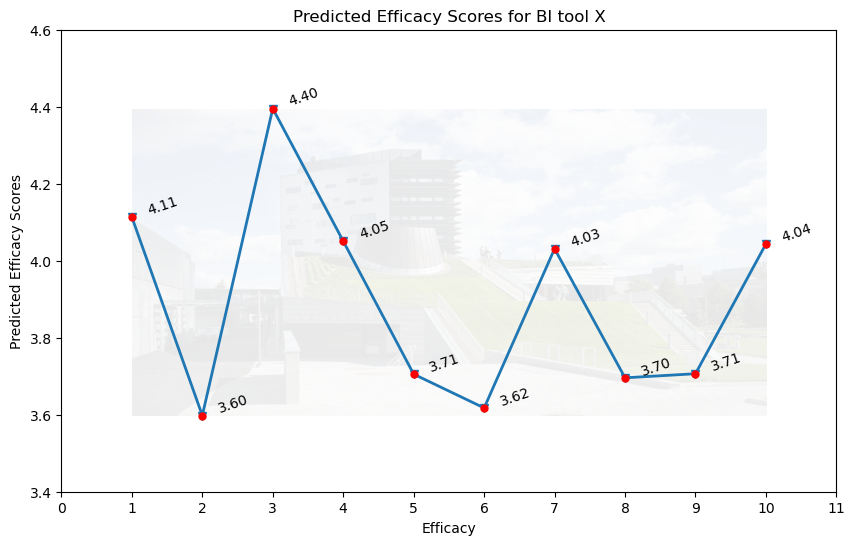

In [26]:
import matplotlib.image as mpimg

# Creating line chart
fig, ax = plt.subplots(figsize=(10, 6))

# Setting background image
watermark_img = mpimg.imread('kampusareenan-etusivu-www_jalonen.jpg')
ax.imshow(watermark_img, extent=[1, 10, min(predicted_scores), max(predicted_scores)], aspect='auto', alpha=0.1)

# Plotting predicted scores
ax.plot(range(1, 11), predicted_scores, 'v-', linewidth=2)
ax.plot(range(1, 11), predicted_scores, 'r.', markersize=10)

# Setting y-axis limits
ax.set_ylim(3.4, 4.6)

# Adding score values as text with slight adjustment
for i, score in enumerate(predicted_scores):
    ax.text(i + 1.2, score, f'{score:.2f}', ha='left', rotation=19, va='bottom')

ax.set_xlabel('Efficacy')
ax.set_ylabel('Predicted Efficacy Scores')
ax.set_title('Predicted Efficacy Scores for BI tool X')
ax.set_xticks(range(0, 12))

plt.show()


## Model Evaluation

In [22]:
# Evaluate the linear regression model
train_mse_lr = mean_squared_error(y_train, regressor.predict(X_train))
test_mse_lr = mean_squared_error(y_test, regressor.predict(X_test))

# Evaluate the Ridge regression model
train_mse_ridge = mean_squared_error(y_train, regressor.predict(X_train))
test_mse_ridge = mean_squared_error(y_test, regressor.predict(X_test))

# Printing result
print("Linear Regression (Training Set) MSE:", round(train_mse_lr, 2))
print("Linear Regression (Testing Set) MSE:", round(test_mse_lr, 2))
print("Ridge Regression (Training Set) MSE:", round(train_mse_ridge, 2))
print("Ridge Regression (Testing Set) MSE:", round(test_mse_ridge, 2))

Linear Regression (Training Set) MSE: 0.02
Linear Regression (Testing Set) MSE: 0.61
Ridge Regression (Training Set) MSE: 0.02
Ridge Regression (Testing Set) MSE: 0.61


#### The evaluation of the linear regression and ridge regression models on the training and testing sets reveals promising results. Both models exhibit relatively low mean squared error (MSE) values, with 0.02 for the training set and 0.61 for the testing set. The similarity in MSE values suggests that both models perform comparably well in predicting the efficacy scores.

#### Although the low MSE values indicate good performance, it is crucial to conduct further evaluation and validation This process ensures the reliability and generalization capabilities of the models. It could be possible if I had more time. However, due to time constraints and the scope of my thesis,  I am concluding the analysis here.